### Load MNIST data

In [29]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# loading the dataset
d0 = pd.read_csv("train.csv")

print(d0.head())

# segregating the labels and the features
l = d0['label']
d = d0.drop('label',axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [30]:
# shape of features and label
print("Shape of features",d.shape)
print("Shape of labels",l.shape)

Shape of features (42000, 784)
Shape of labels (42000,)


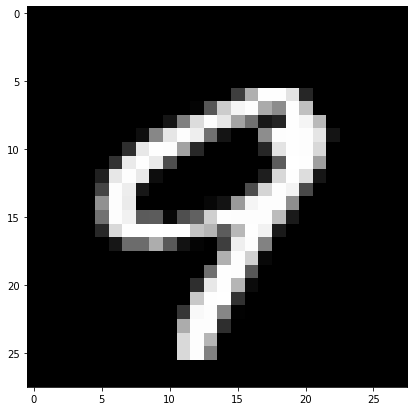

9


In [31]:
# display or plot a number
plt.figure(figsize = (7,7))
idx = 100

# reshaping 1d to 2d
grid_data = d.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data, interpolation='none', cmap='gray')
plt.show()

print(l[idx])

### 2D Visualization using PCA

In [32]:
# picking first 15K data-points to work on for time-efficiency 

labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data =",data.shape)

the shape of sample data = (15000, 784)


In [33]:
# data preprocessing: Standardizing the data

from sklearn.preprocessing import StandardScaler
standardised_data = StandardScaler().fit_transform(data)
print(standardised_data.shape)

(15000, 784)


In [34]:
# finding the co-variance matrix which is A^T * A
sample_data = standardised_data

# matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print("The shape of covariance matrix = ", covar_matrix.shape)

The shape of covariance matrix =  (784, 784)


In [35]:
# finding the top two eigen values and corresponding eigen vectors
# for projecting onto 2D space

from scipy.linalg import eigh

# the parameter 'eigvals' is defined (low value to high value)
# eigh function will return the eigen values in ascending order
# this code generates only top 2 

values, vectors = eigh(covar_matrix, eigvals=(782,783))

print("Shape of eigen vectors = ", vectors.shape)

# converting the eigen vectors into (2,d) shape 
vectors = vectors.T

print("Updated shape of eigen vetors =",vectors.shape)
# here the vectors[1] represent the eigen vector corresponding to 1st principal axis
# here the vectors[0] represent the eigen vector corresponding to 2nd principal axis

Shape of eigen vectors =  (784, 2)
Updated shape of eigen vetors = (2, 784)


In [36]:
# projecting the original data sample on the plane
# formed by two principal eigen vectors by vector-vector multiplication

new_coordinates = np.matmul(vectors, sample_data.T)

print("resultant new data points' shape ",vectors.shape, "X", sample_data.T.shape, "=", new_coordinates.shape)

resultant new data points' shape  (2, 784) X (784, 15000) = (2, 15000)


In [37]:
# appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates,labels)).T

# creating a new data frame for plotting labelled points
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st principal","2nd principal","label"))
print(dataframe.head())

   1st principal  2nd principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


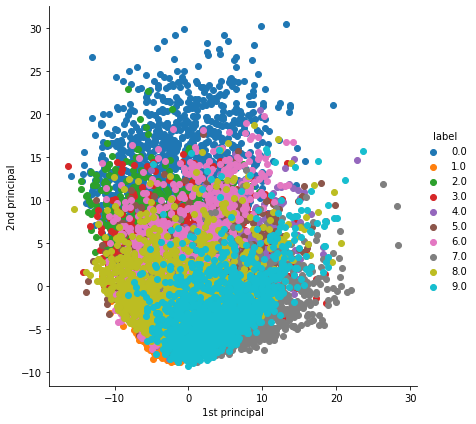

In [38]:
# plotting the 2D data points with seaborn
import seaborn as sns

sns.FacetGrid(dataframe, hue='label',size=6).map(plt.scatter,'1st principal','2nd principal').add_legend()

### PCA using Scikit-Learn

In [39]:
# initialising the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [40]:
# configuring the parameters
# the number of components = 2
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

print("new shape is ",pca_data.shape)

new shape is  (15000, 2)


(15000, 3)


C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


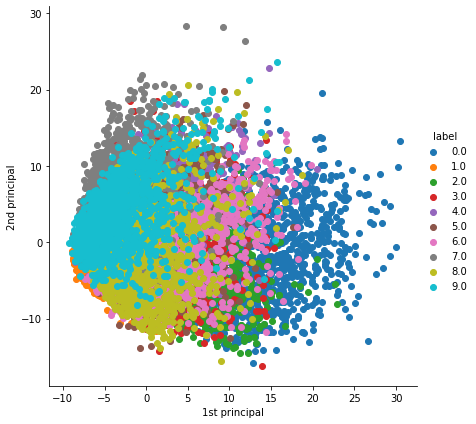

In [41]:
# attaching the label for each 2D data points
pca_data = np.vstack((pca_data.T,labels)).T
print(pca_data.shape)

# creating a new data frame which will help us in ploting the resultant data
pca_df = pd.DataFrame(data=pca_data, columns=("1st principal","2nd principal","label"))
sns.FacetGrid(pca_df, hue='label',size=6).map(plt.scatter,'1st principal','2nd principal').add_legend()

### Measure of variance captured

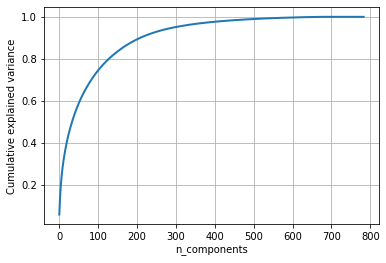

In [42]:
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explaied = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize = (6,4))

plt.plot(cum_var_explaied, linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative explained variance')
plt.show()